In [9]:
from math import floor, pi
import numpy as np
import matplotlib.pyplot as plt
import math as math


from helpers.mach24 import Mach24Stage, CircularMach24Fin, get_mach_24_rocket
from helpers.simple_eulersolve import eulersolve_while_positive

# Rocket flight path modeling

This script simulates a sample design of our mach-24 two staged rocket. The simulation is build from first principles and was verified to be accurate by comparing it to OpenRocket.

The values are the following:
1. Stage
    - Burn time 3.7 s
    - Average thrust 660N
    - Propellant mass: 1.2kg
    - Diameter 6cm
    - Staging delay 12s
2. Stage
    - Burn time 1.7 s
    - Average thrust 336N
    - Propellant mass: 0.204kg
    - Diameter 5.2cm
    - Ignition delay 1.5s

The simulation is modeling:
1. Air resistance (uses diameter of the rocket and coefficient of drag)
2. Thrust profiles
3. Mass loss
4. Losses due to spinning the rocket
5. Staging delays

Note: effects at speeds close to the speed of sound are not being included. This makes the simulation less accurate then e.g. open rocket in certain aspects. OpenRocket should always be used to make final assumptions about any flight

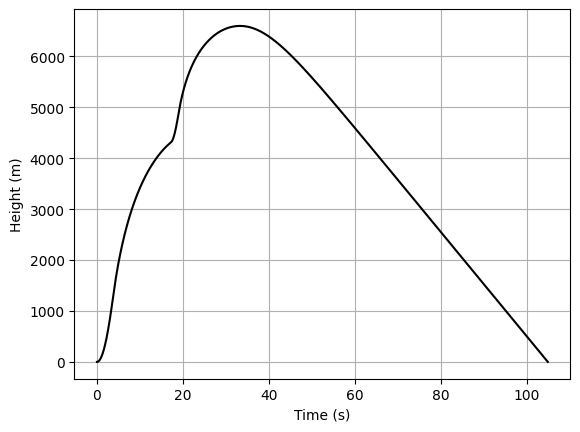

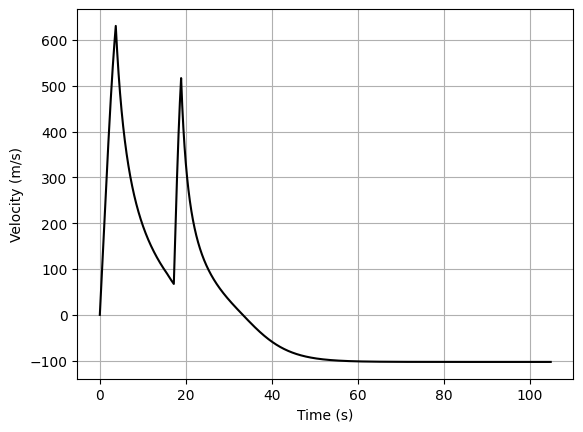

In [10]:
stage1 = Mach24Stage(3.7, 660, 1.204, 1.2, 0.060/2, 0, 12, CircularMach24Fin(0.06))
stage2 = Mach24Stage(1.7, 336, 0.204, 0.8, 0.052/2, 1.5, 0, CircularMach24Fin(0.06))


rocket_equation, initial = get_mach_24_rocket([stage1, stage2], 0, 0.7)

tvec, xvec = eulersolve_while_positive(rocket_equation, 0, initial, 0.01)

rotation_hz = xvec[0:, 3:4]/(2*math.pi)

plt.plot(tvec, xvec[0:, 0:1], color = 'black')

plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.grid()

plt.show()

plt.plot(tvec, xvec[0:, 1:2], color = 'black')
# plt.plot(tvec, rotation_hz, color = 'green')

plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid()

plt.show()

# second_fire_time = (stage1.burn_time + stage1.stage_delay + stage2.ignition_delay)
# second_fire_index = int(second_fire_time/0.01)

# print(xvec[second_fire_index:second_fire_index+1, 0:1])